#   MODUL 3 : TRANSFORMASI WAVELET 

Code dibawah merupakan beberapa library yang digunakan untuk melakukan import module. Import module ini berfungsi untuk menspesifikasikan module dari beberapa (library) yang digunakan dan 'as' digunakan sebagai penamaan alias pada module agar lebih mudah untuk melakukan import module. 

In [305]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 

Code  dibawah digunakan mendefinisikan dua filter, yaitu 'lowPassFilter' dan 'highPassFilter', yang digunakan dalam pemrosesan sinyal. Low-pass filter bertujuan untuk melewatkan komponen frekuensi rendah dari sinyal input, sementara high-pass filter bertujuan untuk melewatkan komponen frekuensi tinggi. Fungsi filter ini adalah untuk mengubah sinyal input dengan memberikan bobot tertentu pada komponen frekuensi yang diinginkan. Bobot yang digunakan dalam filter ini adalah '0.7' dan '-0.7'.

In [306]:
# definisi filter
lowPassFilter = np.array([0.7, 0.7])
highPassFilter = np.array([-0.7, 0.7])

## Grayscale

Code dibawah berfungsi untuk membaca sebuah gambar dengan nama file 'IoriYagami.jpg' menggunakan library OpenCV dan menyimpannya dalam variabel 'img'. Gambar tersebut memiliki mode warna grayscale (0). Selanjutnya, gambar tersebut ditampilkan menggunakan fungsi imshow dari library matplotlib. Parameter cmap='gray' digunakan untuk menampilkan gambar dalam skala abu-abu (grayscale).

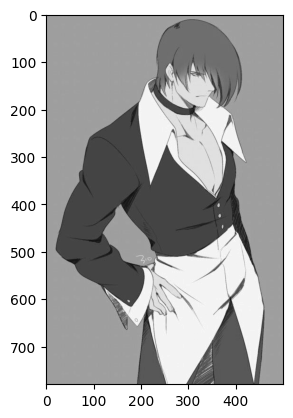

In [307]:
img = cv2.imread('IoriYagami.jpg', 0)
plt.imshow(img, cmap='gray')

In [308]:
# def take (img): 
#     image = cv2.imread(img)
#     image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#     return image
# # plt.imshow()

In [309]:
# img = cv2.imread("IoriYagami.jpg")
# gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# plt.imshow(gray_img, cmap="gray")

Code dibawah berfungsi untuk melakukan dekomposisi citra menggunakan kernel Haar. Citra input (img) dibagi menjadi empat bagian: LL (representasi rendah-rendah), LH (representasi rendah-tinggi), HL (representasi tinggi-rendah), dan HH (representasi tinggi-tinggi). Setiap blok 2x2 piksel pada citra input diambil, dan nilai pikselnya digunakan untuk melakukan perhitungan dekomposisi sesuai dengan rumus Haar. Hasil dekomposisi disimpan dalam matriks citra dekomposisi (ll, lh, hl, hh), yang dikembalikan sebagai output dari fungsi.

In [323]:
def decomposition (img):
    timg, limg = img.shape # untuk mengambil ukuran citra
    k = 0.7071067812 # merupakan nilai dari kernel haar
    t = int(timg/2); l = int(limg/2) # untuk menentukan ukuran citra dekomposisi
    ll = np.zeros([t,l]) 
    lh = np.zeros([t,l]) 
    hl = np.zeros([t,l]) 
    hh = np.zeros([t,l]) 
   
    for i in range(0,timg,2):
        for j in range(0,limg,2):
            x = int(i/2); y = int(j/2) # merupakan koordinat citra hasil dekomposisi
            
            # untuk mengambil nilai matrix citra yang akan diproses
            z = np.zeros(4)
            z[0] = img[i][j]
            z[1] = img[i][j+1]
            z[2] = img[i+1][j]
            z[3] = img[i+1][j+1]
            
            # untuk melakukan dekomposisi citra
            ll[x][y] = (z[0]+z[1]+z[2]+z[3])*k
            lh[x][y] = (z[0]+z[1]-z[2]-z[3])*k
            hl[x][y] = (z[0]-z[1]+z[2]-z[3])*k
            hh[x][y] = (z[0]-z[1]-z[2]+z[3])*k
            
    return ll, lh, hl, hh

Code dibawah berfungsi untuk menampilkan empat citra secara berdampingan dalam satu gambar dengan menggunakan library matplotlib. Input fungsi (a, b, c, d) adalah empat citra yang ingin ditampilkan.Code ini mengatur ukuran gambar menjadi 25x25 inci menggunakan `plt.figure(figsize=(25,25))`. Selanjutnya, menggunakan `plt.subplot()` untuk membuat empat subplots dalam satu gambar dengan tata letak 1 baris dan 4 kolom.



In [324]:
def show (a, b, c, d):
    plt.figure(figsize=(20,20))
    plt.subplot(1,4,1)
    
    plt.imshow(a, cmap='gray')
    plt.title ('Approximation')
    
    plt.subplot(1,4,2)
    plt.imshow(b, cmap='gray')
    plt.title ('Horizontal Details')
    
    plt.subplot(1,4,3)
    plt.imshow(c, cmap='gray')
    plt.title ('Vertical Details')
   
    plt.subplot(1,4,4)
    plt.title ('Diagonal Details')
    plt.imshow(d, cmap='gray')


Code dibawah berfungsi untuk melakukan dekomposisi citra yang diambil dari citra "IoriYagami.jpg". Fungsi `decomposition()` dipanggil dengan citra tersebut sebagai input, dan menghasilkan empat citra dekomposisi, yaitu `ll`, `lh`, `hl`, dan `hh`. Fungsi `show()` kemudian dipanggil dengan parameter citra-citra dekomposisi tersebut untuk menampilkan hasilnya.

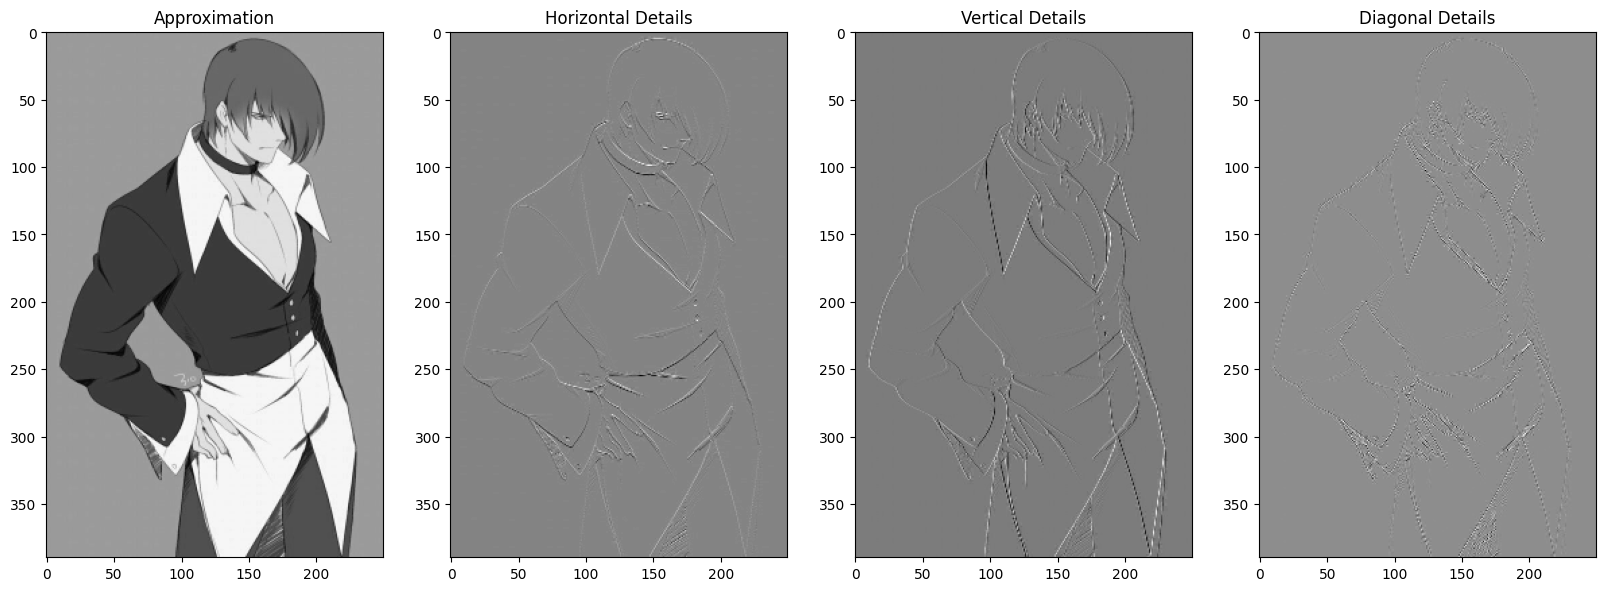

In [325]:
image = take("IoriYagami.jpg")

ll, lh, hl, hh = decomposition(image) # menjalankan proses dekomposisi
show(ll, lh, hl, hh)

Code dibawah digunakan untuk mendefinisikan dua fungsi, yaitu 'rowPadding' dan 'columnPadding', yang digunakan untuk melakukan padding pada gambar. Fungsi rowPadding menambahkan n kolom kosong di sebelah kanan gambar, sedangkan fungsi 'columnPadding' menambahkan n baris kosong di bagian bawah gambar. Padding dilakukan menggunakan fungsi 'np.pad' dari library NumPy. Tujuan dari padding ini adalah untuk mengubah ukuran gambar sehingga dapat memenuhi kebutuhan pemrosesan yang mengharuskan ukuran gambar yang lebih besar atau seragam. Hasil padding tersebut akan dikembalikan sebagai output dari fungsi masing-masing.

In [313]:
def rowPadding(img, n):
    n = len(n) - 1
    result = np.pad(img, [(0, 0), (0, n)])
    return result

def columnPadding(img, n):
    n = len(n) - 1
    result = np.pad(img, [(0, n), (0, 0)])
    return result

Code dibawah digunakan untuk mendefinisikan dua fungsi, yaitu 'rowConvolution' dan 'columnConvolution', yang digunakan untuk melakukan konvolusi pada gambar. Fungsi 'rowConvolution' melakukan konvolusi pada setiap baris gambar dengan memanfaatkan padding dan kernel yang diberikan. Sedangkan fungsi 'columnConvolution' melakukan konvolusi pada setiap kolom gambar dengan memanfaatkan padding dan kernel yang diberikan. Konvolusi dilakukan dengan mengalikan setiap elemen kernel dengan elemen yang sesuai pada gambar yang telah dipadding, dan hasilnya dijumlahkan. Hasil konvolusi tersebut akan dikembalikan sebagai output dari masing-masing fungsi.

In [314]:
def rowConvolution(pad, kernel, img):
    result = np.zeros(img.shape)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            for k in range(len(kernel)):
                result[i][j] += (kernel[k] * pad[i, j + k])
    return result

def columnConvolution(pad, kernel, img):
    result = np.zeros(img.shape)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            for k in range(len(kernel)):
                result[i][j] += (kernel[k] * pad[i + k, j])
    return result

Code dibawah digunakan untuk mendefinisikan dua fungsi, yaitu 'rowDownSampling' dan 'columnDownSampling', yang digunakan untuk melakukan penurunan sampling (downsampling) pada array atau gambar. Fungsi 'rowDownSampling' melakukan downsampling dengan mengambil setiap baris kedua dari array input dan membuang baris-baris yang tidak diambil. Fungsi 'columnDownSampling' melakukan downsampling dengan mengambil setiap kolom kedua dari array input dan membuang kolom-kolom yang tidak diambil. Hasil downsampling tersebut akan dikembalikan sebagai output dari masing-masing fungsi.

In [315]:
def rowDownSampling(array):
    baris = int(array.shape[0] / 2)
    kolom = int(array.shape[1])
    result = np.zeros((baris, kolom))
    index = 0
    for i in range(baris):
        for j in range(kolom):
            result[i][j] = array[index][j]
        index += 2
    return result

def columnDownSampling(array):
    baris = int(array.shape[0])
    kolom = int(array.shape[1] / 2)
    result = np.zeros((baris, kolom))
    for i in range(baris):
        index = 0
        for j in range(kolom):
            result[i][j] = array[i][index]
            index += 2
    return result


Code dibawah berfungsi untuk mendefinisikan fungsi dekomposisi yang menggabungkan serangkaian operasi pemrosesan citra. Fungsi tersebut menerima input citra serta dua filter 'f1' dan 'f2'. Pertama, citra di-padding pada baris menggunakan 'f1'. Kemudian, dilakukan konvolusi baris menggunakan 'f1' pada citra yang telah dipadding. Hasil konvolusi tersebut kemudian di-downsample pada kolom menggunakan fungsi 'columnDownSampling'. Selanjutnya, hasil downsampling tersebut di-padding pada kolom menggunakan 'f2'. Dilakukan konvolusi kolom menggunakan 'f2' pada hasil padding sebelumnya. Hasil konvolusi kolom tersebut kemudian di-downsample pada baris menggunakan fungsi 'rowDownSampling'. Hasil akhir dari proses dekomposisi adalah hasil downsampling pada baris terakhir, yang akan dikembalikan sebagai output.

In [316]:
def dekomposisi(citra, f1, f2):
    Pad1 = rowPadding(citra, f1)
    Konvolusi1 = rowConvolution(Pad1, f1, citra)
    DownSampling1 = columnDownSampling(Konvolusi1)
    Pad2 = columnPadding(DownSampling1, f2)
    Konvolusi2 = columnConvolution(Pad2, f2, DownSampling1)
    DownSampling2 = rowDownSampling(Konvolusi2)
    Result = DownSampling2
    return Result

Code dibawah digunakan untuk mendefinisikan fungsi 'normalizeImage' yang digunakan untuk normalisasi intensitas gambar. Pertama, nilai minimum dan maksimum dari gambar dihitung menggunakan fungsi 'np.min' dan 'np.max'. Kemudian, gambar di-normalisasi dengan mengurangi nilai minimum dan membagi selisih antara nilai maksimum dan minimum. Hasil normalisasi tersebut kemudian dikalikan dengan 255 untuk mengubah rentang nilai menjadi 0-255. Dan hasil akhirnya, gambar yang telah dinormalisasi diubah tipe datanya menjadi 'np.uint8' dan dikembalikan sebagai output fungsi.

In [317]:
def normalizeImage(img):
    min_val = np.min(img)
    max_val = np.max(img)
    normalizedImg = ((img - min_val) / (max_val - min_val)) * 255
    return normalizedImg.astype(np.uint8)

Code dibawah digunakan untuk mengimplementasikan proses dekomposisi multi-level pada gambar menggunakan filter low-pass (LP) dan high-pass (HP). Iterasi dilakukan sebanyak 'num_levels'. Pada setiap level, gambar saat ini didekomposisi menjadi komponen LL, LH, HL, dan HH menggunakan fungsi dekomposisi. Setiap komponen kemudian dinormalisasi menggunakan fungsi 'normalizeImage' dan disimpan dalam daftar masing-masing (LL_levels, LH_levels, HL_levels, HH_levels). Setelah itu, gambar-gambar yang didekomposisi ditampilkan dalam bentuk subplot menggunakan 'matplotlib'. Terakhir, pesan "Multi-level dekomposisi dan penggabungan selesai" dicetak.

Proses dekomposisi level 1...


Proses dekomposisi level 2...
Proses dekomposisi level 3...
Proses dekomposisi level 4...
Proses dekomposisi level 5...
Proses dekomposisi level 6...


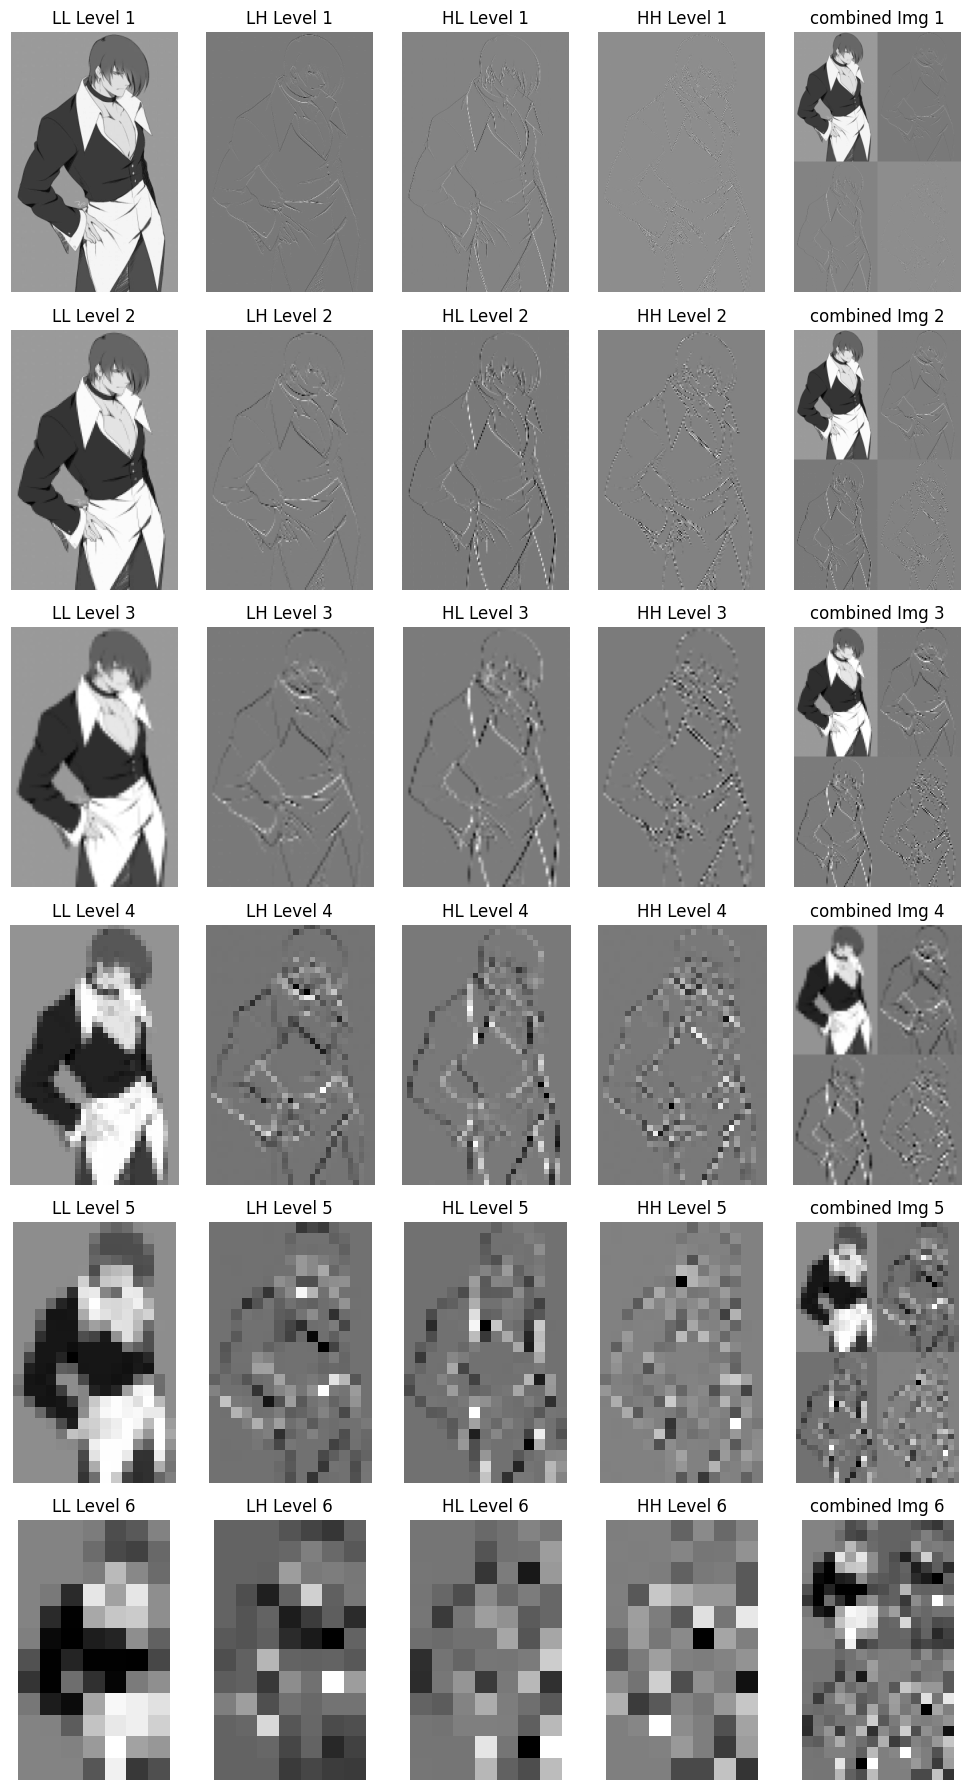

In [318]:
# Jumlah level dekomposisi
num_levels = 6  

# Jumlah filter level
LL_levels = []
LH_levels = []
HL_levels = []
HH_levels = []
combinedImg = []

currentImage = img
for level in range(1, num_levels + 1):
    print(f"Proses dekomposisi level {level}...")
    
    # Dekomposisi antara level - level
    LL = dekomposisi(currentImage, lowPassFilter, lowPassFilter)
    LH = dekomposisi(currentImage, lowPassFilter, highPassFilter)
    HL = dekomposisi(currentImage, highPassFilter, lowPassFilter)
    HH = dekomposisi(currentImage, highPassFilter, highPassFilter)
    
    # Menormalkan dan menyimpan setiap komponen masing-masing
    LL_levels.append(normalizeImage(LL))
    LH_levels.append(normalizeImage(LH))
    HL_levels.append(normalizeImage(HL))
    HH_levels.append(normalizeImage(HH))
    combinedImg.append(np.vstack([np.hstack([normalizeImage(LL), normalizeImage(LH)]), np.hstack([normalizeImage(HL),normalizeImage(HH)])]))
        
    # Update gambar sekarang untuk dekomposisi tingkat berikutnya dengan menggunakan LL sebagai input untuk tingkat berikutnya
    currentImage = LL

# menampilkan LL, LH, HL, HH, dan gambar gabungan untuk setiap level
fig, axes = plt.subplots(num_levels, 5, figsize=(10, 3*num_levels))

for level in range(num_levels):
    axes[level, 0].imshow(LL_levels[level], cmap='gray')
    axes[level, 0].set_title(f"LL Level {level+1}")
    axes[level, 0].axis('off')
    
    axes[level, 1].imshow(LH_levels[level], cmap='gray')
    axes[level, 1].set_title(f"LH Level {level+1}")
    axes[level, 1].axis('off')
    
    axes[level, 2].imshow(HL_levels[level], cmap='gray')
    axes[level, 2].set_title(f"HL Level {level+1}")
    axes[level, 2].axis('off')
    
    axes[level, 3].imshow(HH_levels[level], cmap='gray')
    axes[level, 3].set_title(f"HH Level {level+1}")
    axes[level, 3].axis('off')

    axes[level, 4].imshow(combinedImg[level], cmap='gray')
    axes[level, 4].set_title(f"combined Img {level+1}")
    axes[level, 4].axis('off')
    

plt.tight_layout()
plt.show()


## NO 2. Rekonstruksi dari Hasil Dekomposisi

Code dibawah merupakan sebuah fungsi `rekonstruksi()` yang digunakan untuk melakukan rekonstruksi citra dari level terendah hingga level tertinggi dalam suatu piramida wavelet. Selanjutnya, dilakukan rekonstruksi pada setiap level dengan memanggil fungsi `rekonstruksi()` dan hasilnya disimpan dalam list `reconstructedImages`. Kemudian, hasil rekonstruksi ditampilkan dalam satu baris menggunakan `plt.subplots()`. Setiap gambar rekonstruksi ditampilkan pada sumbu yang sesuai dengan levelnya, dengan judul "Reconstructed Level X" dan tanpa menampilkan sumbu x dan y. Terakhir, gambar-gambar rekonstruksi ditampilkan menggunakan `plt.show()` dan pesan "Multi-level reconstruction complete." ditampilkan di layar.

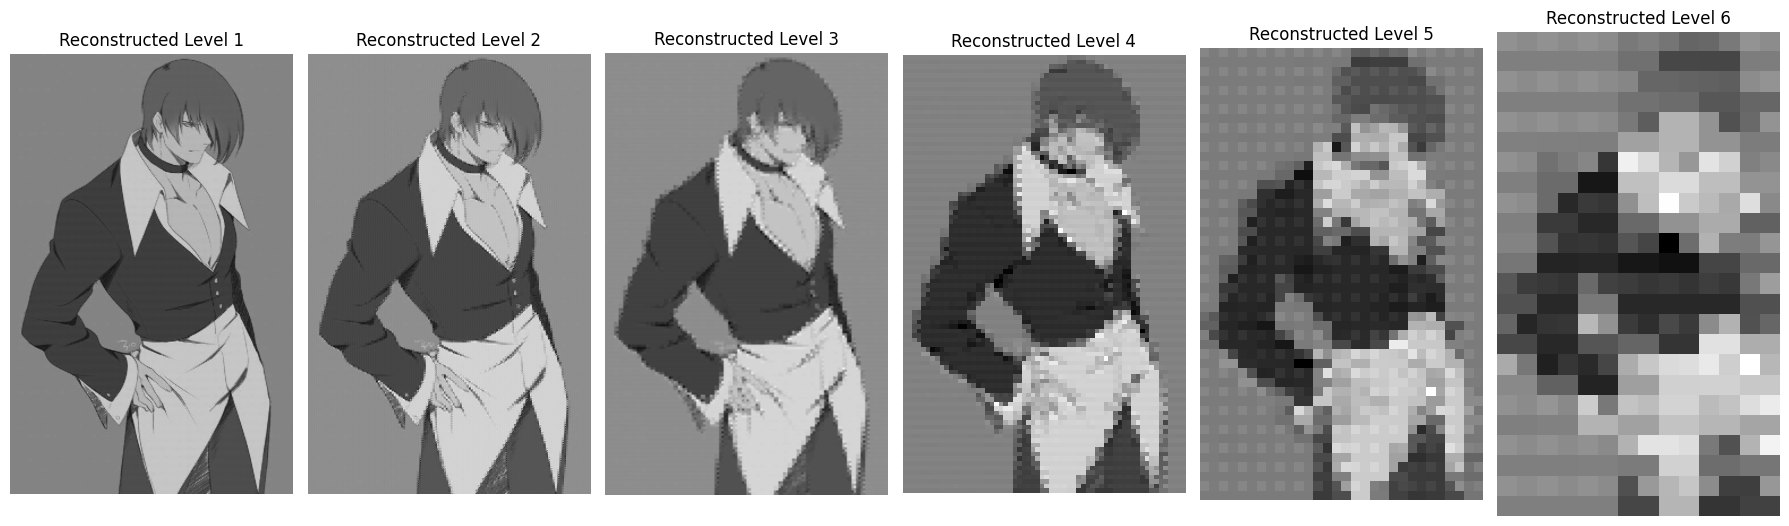

Multi-level reconstruction complete.


In [319]:
def rekonstruksi(LL, LH, HL, HH):
    tinggi_img, lebar_img = LL.shape 
    t = tinggi_img * 2
    l = lebar_img * 2 
    image = np.zeros([t, l]) 
    LL2, LH2 = np.zeros([t, l]), np.zeros([t, l]) 
    HL2, HH2 = np.zeros([t, l]), np.zeros([t, l]) 
    
    # Rekonstruksi dari level tertinggi ke level terendah
    for i in range(t // 2):
        for j in range(l // 2):
            LL2[2*i][2*j] = LL[i][j]
            LH2[2*i][2*j] = LH[i][j]
            HL2[2*i][2*j] = HL[i][j]
            HH2[2*i][2*j] = HH[i][j]
    
    for i in range(1, t, 2):
        for j in range(l):
            LL2[i][j] = LL2[i-1][j] + LH2[i-1][j]
    
    for i in range(t):
        for j in range(1, l, 2):
            LL2[i][j] = LL2[i][j-1] + HL2[i][j-1]
    
    for i in range(t):
        for j in range(l):
            image[i][j] = LL2[i][j] + HH2[i][j]
    
    return image

# Rekonstruksi dari level terendah ke level tertinggi
reconstructedImages = []
for i in range(num_levels):
    reconstructedImage = rekonstruksi(LL_levels[i], LH_levels[i], HL_levels[i], HH_levels[i])
    reconstructedImages.append(normalizeImage(reconstructedImage))

# menampilkan hasil gambar rekonstruksi
fig, axes = plt.subplots(1, num_levels, figsize=(3*num_levels, 10))
for i in range(num_levels):
    axes[i].imshow(reconstructedImages[i], cmap='gray')
    axes[i].set_title(f"Reconstructed Level {i+1}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

print("Multi-level reconstruction complete.")


## NO 3. Pada level berapa hasil dari dekomposisi berikut? berikan alasannya

- Pengurangan Resolusi, proses downsampling mengakibatkan kehilangan detail gambar karena hanya setiap piksel kedua yang dipilih. Ini mengakibatkan gambar yang tampak lebih kasar atau tersegmentasi karena detailnya hilang.
- Dimensi Citra, dengan menurunkan ukuran citra di setiap tingkatan dalam dekomposisi wavelet, informasi semakin berkurang dan gambar menjadi lebih kasar.
- Filtering, penggunaan filter konvolusi berpengaruh terhadap kualitas akhir dari setiap komponen (LL, LH, HL, HH). Penggunaan filter low pass dan high pass menentukan efektivitas dekompresi gambar pada setiap level.

## NO 4. Menampilkan Representasi Sinyal pada Hasil Dekomposisi pada Nomor 3

Code dibawah digunakan untuk mendefinisikan fungsi 'getAmplitudeIndex' yang digunakan untuk menghitung amplitudo dan indeks dari sebuah gambar. Fungsi tersebut mengambil input berupa gambar '(img)' dan menghitung amplitudo dengan meng-normalisasi nilai-nilai piksel gambar ke dalam rentang 0-255. Selanjutnya, fungsi ini juga menghitung indeks dari setiap piksel gambar dengan menggunakan 'np.arange' dan mengubah bentuknya menjadi sesuai dengan dimensi gambar. Fungsi mengembalikan amplitudo dan indeks sebagai output. Variabel 'num_levels' digunakan di luar fungsi dan tidak berhubungan langsung dengan fungsinya.

In [320]:
def getAmplitudeIndex(img):
    amplitude = (img - np.min(img)) * (255 / (np.max(img) - np.min(img)))
    index = np.arange(img.size).reshape(img.shape)

    return amplitude, index

num_levels = 6 

Code dibawah berfungsi untuk melakukan proses dekomposisi multi-level pada gambar. Gambar awal disimpan dalam variabel 'currentImage'. Selama iterasi berjalan dari level 1 hingga level 'num_levels', gambar saat ini didekomposisi menjadi empat komponen: LL, LH, HL, dan HH menggunakan filter low-pass (LP) dan high-pass (HP). Komponen-komponen tersebut kemudian dinormalisasi menjadi 'LL_norm', 'LH_norm', 'HL_norm', dan 'HH_norm' menggunakan fungsi 'normalizeImage'. Jika level adalah 6, amplitudo dan indeks dari LL_norm, LH_norm, HL_norm, dan HH_norm dihitung menggunakan fungsi 'getAmplitudeIndex'. Dan hasil amplitudo dan indeks dari komponen-komponen tersebut ditampilkan dalam subplot menggunakan matplotlib. Setelah selesai semua level, pesan "Multi-level dekomposisi representasi citra level 6" dicetak.

Proses dekomposisi level 1...


Proses dekomposisi level 2...
Proses dekomposisi level 3...
Proses dekomposisi level 4...
Proses dekomposisi level 5...
Proses dekomposisi level 6...


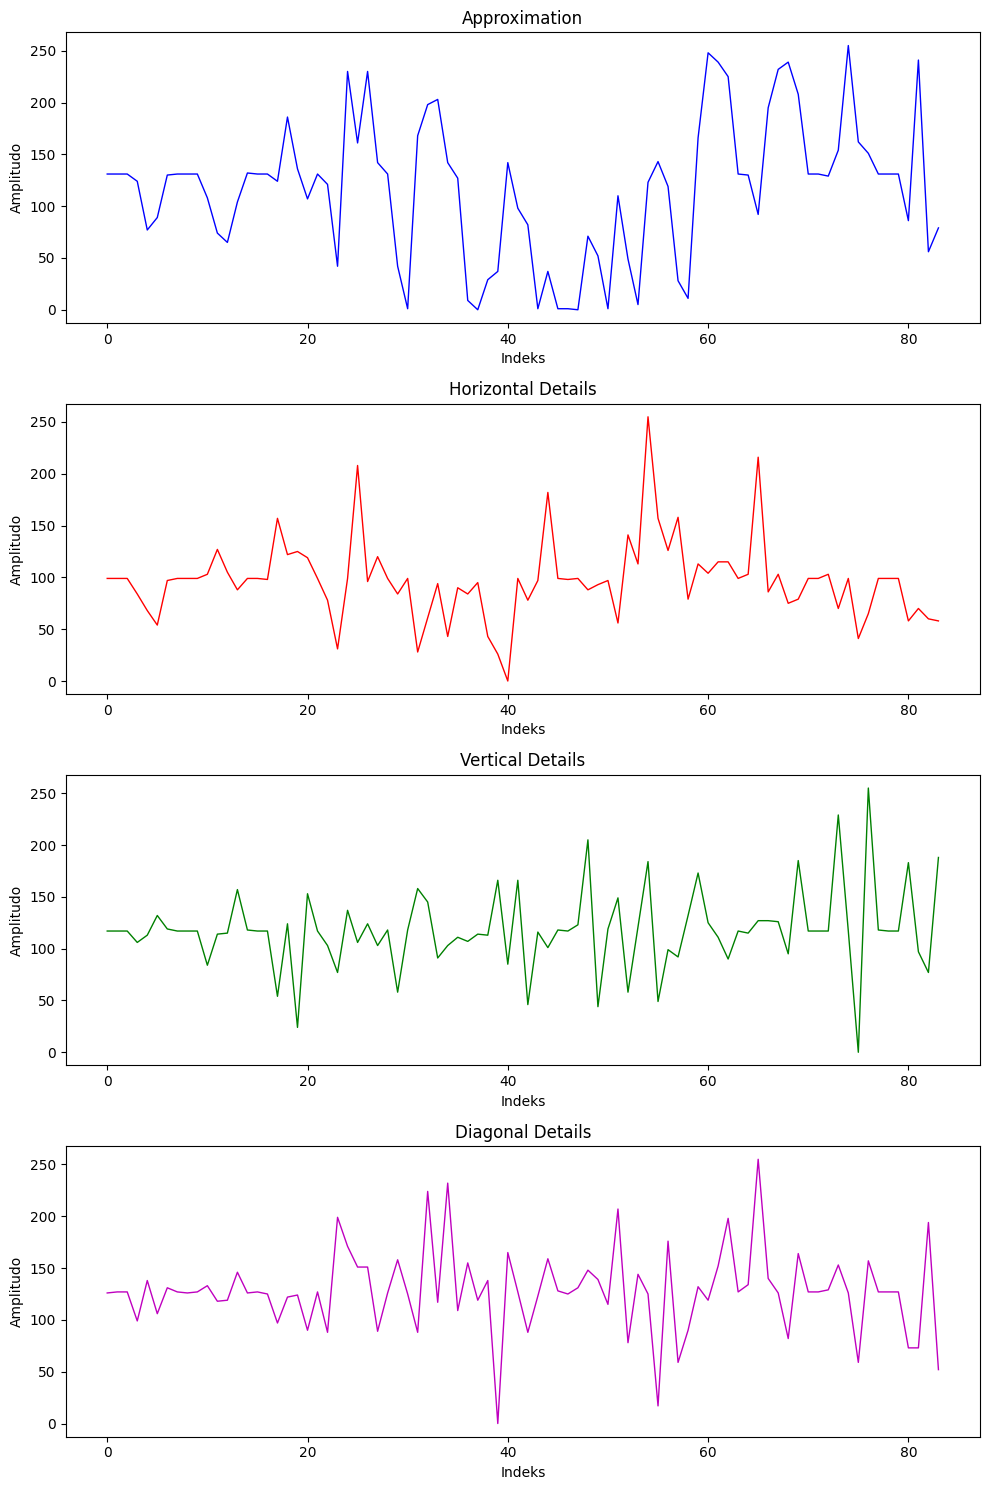

Multi-level dekomposisi representasi citra level 6.


In [321]:
currentImage = img
for level in range(1, num_levels + 1):
    print(f"Proses dekomposisi level {level}...")
    
    LL = dekomposisi(currentImage, lowPassFilter, lowPassFilter)
    LH = dekomposisi(currentImage, lowPassFilter, highPassFilter)
    HL = dekomposisi(currentImage, highPassFilter, lowPassFilter)
    HH = dekomposisi(currentImage, highPassFilter, highPassFilter)
    
    LL_norm = normalizeImage(LL)
    LH_norm = normalizeImage(LH)
    HL_norm = normalizeImage(HL)
    HH_norm = normalizeImage(HH)
    
    if level == 6:
        LL_amp, LL_idx = getAmplitudeIndex(LL_norm)
        LH_amp, LH_idx = getAmplitudeIndex(LH_norm)
        HL_amp, HL_idx = getAmplitudeIndex(HL_norm)
        HH_amp, HH_idx = getAmplitudeIndex(HH_norm)
        
        fig, axes = plt.subplots(4, 1, figsize=(10, 15))
        
        axes[0].plot(LL_idx.flatten(), LL_amp.flatten(), 'b-', linewidth=1)
        axes[0].set_title("Approximation")
        axes[0].set_xlabel("Indeks")
        axes[0].set_ylabel("Amplitudo")
        
        axes[1].plot(LH_idx.flatten(), LH_amp.flatten(), 'r-', linewidth=1)
        axes[1].set_title("Horizontal Details")
        axes[1].set_xlabel("Indeks")
        axes[1].set_ylabel("Amplitudo")
        
        axes[2].plot(HL_idx.flatten(), HL_amp.flatten(), 'g-', linewidth=1)
        axes[2].set_title("Vertical Details")
        axes[2].set_xlabel("Indeks")
        axes[2].set_ylabel("Amplitudo")
        
        axes[3].plot(HH_idx.flatten(), HH_amp.flatten(), 'm-', linewidth=1)
        axes[3].set_title("Diagonal Details")
        axes[3].set_xlabel("Indeks")
        axes[3].set_ylabel("Amplitudo")
        
        plt.tight_layout()
        plt.show()
    
    currentImage = LL 

print("Multi-level dekomposisi representasi citra level 6.")